# Introduction to Simulations

1. $u$ plays the role of noise, and we do not want to fit our model to the noise. 

2. The following is code for a simulation with `samples` number of samples and `N` observations.

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

def simulation(samples, N):
    beta = np.array([[3],[2],[-2]])
    beta_hats = []
    for i in range(samples):
        X = np.random.normal(size = (N, 3))
        U = np.random.normal(size = (N, 1))
        Y = X @ beta + U 
        beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y 
        beta_hats.append(beta_hat[0][0])
    data = np.array(beta_hats)
    return data

The following is the simulation.

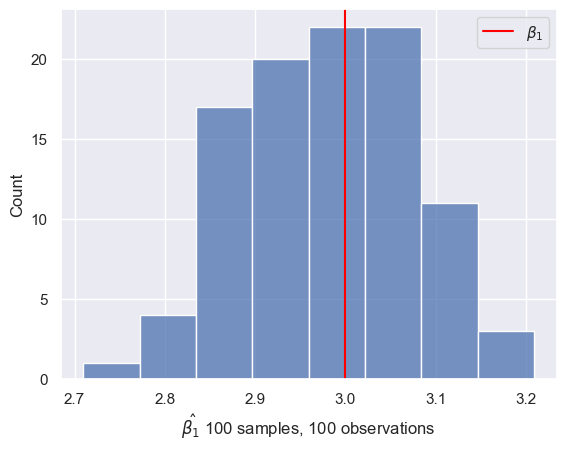

In [47]:
data_1_2 = simulation(100, 100)
sns.histplot(data_1_2)
plt.xlabel(r'$\hat{\beta}_1$ 100 samples, 100 observations')
plt.axvline(x = 3, color = 'red', label = r'$\beta_1$')
plt.legend()
plt.show()

3. The following is the simulation for 1.3

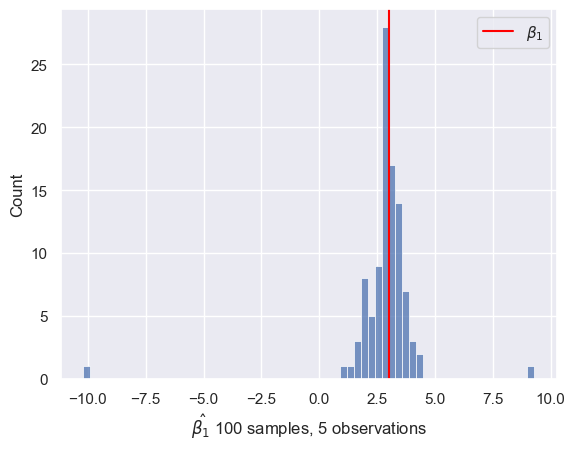

In [48]:
data_1_3 = simulation(100, 5)
sns.histplot(data_1_3)
plt.xlabel(r'$\hat{\beta_1}$ 100 samples, 5 observations')
plt.axvline(x = 3, color = 'red', label = r'$\beta_1$')
plt.legend()
plt.show()

5. The following is the plot together.

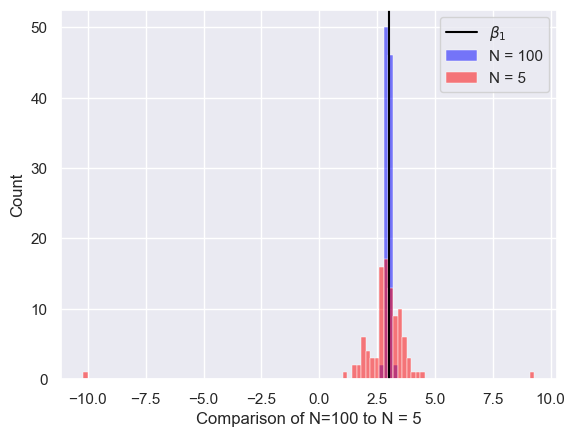

In [50]:
min_val = min(np.min(data_1_2), np.min(data_1_3))
max_val = max(np.max(data_1_2), np.max(data_1_3))
bins = np.linspace(min_val, max_val, 100)
sns.histplot(data_1_2, bins = bins, color = 'blue', alpha = 0.5, label = 'N = 100')
sns.histplot(data_1_3, bins = bins, color = 'red', alpha = 0.5, label = 'N = 5')
plt.axvline(x = 3, color = 'black', label = r'$\beta_1$')
plt.xlabel(r'Comparison of N=100 to N = 5')
plt.legend()
plt.show()

It seems like both of the simulations are unbiased, with the mode occuring at the true value of $\beta_1$. However, it is clear that the simulation with $N = 100$ has a much lower variance than the simulation with $N = 5$.

5. Here is the code for 1.5

In [54]:
beta_hat_1 = []
for N in range(5, 201):
    beta_hat_1.append(simulation(100, N))
beta_hat_1 = np.array(beta_hat_1)

6. Code for 1.6

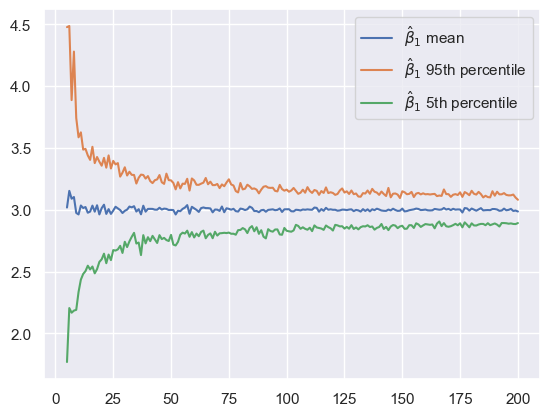

In [63]:
ix = np.arange(5, 201)
beta_hat_1_mean = np.mean(beta_hat_1, axis = 1)
beta_hat_1_95 = np.percentile(beta_hat_1, 95, axis = 1)
beta_hat_1_5 = np.percentile(beta_hat_1, 5, axis = 1)
sns.lineplot(x = ix, y = beta_hat_1_mean, label = r"$\hat{\beta}_1$ mean")
sns.lineplot(x = ix, y = beta_hat_1_95, label = r"$\hat{\beta}_1$ 95th percentile")
sns.lineplot(x = ix, y = beta_hat_1_5, label = r"$\hat{\beta}_1$ 5th percentile")
plt.legend()
plt.show()

7. We see that the variance of the OLS estimator goes to zero as $N$ increases. This showcases the consistency of the OLS estimator.

8. Code for 1.8

In [73]:
import math
def simulation(samples, N):
    beta = np.array([[3],[2],[-2]])
    beta_hats = []
    beta_hats_ci = []
    for _ in range(samples):
        X = np.random.normal(size = (N, 3))
        U = np.random.normal(size = (N, 1))
        Y = X @ beta + U 
        beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y 
        beta_hats.append(beta_hat[0][0])
        se = math.sqrt(np.linalg.inv(X.T @ X)[0][0])
        z = 1.96
        ci = (beta_hat[0][0] - z * se, beta_hat[0][0] + z * se)
        beta_hats_ci.append(ci)
    data = (np.array(beta_hats), np.array(beta_hats_ci))
    return data
beta_hats, beta_hats_ci = simulation(100, 100)
num_contain = np.sum((beta_hats_ci[:, 0] <= 3) & (beta_hats_ci[:, 1] >= 3))
print(f"The number of confidence intervals that contain the true value of beta is {num_contain}")

The number of confidence intervals that contain the true value of beta is 95


9. Code for 1.9

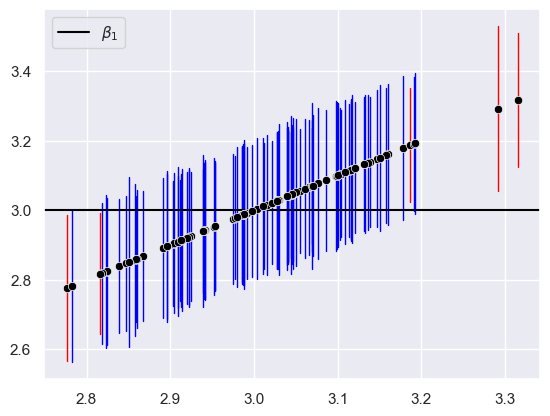

In [78]:
beta = 3
x_blue, y_blue, x_red, y_red = [], [], [], []
for i, (lower, upper) in enumerate(beta_hats_ci):
    if (lower <= beta <= upper):
        x_blue.append(beta_hats[i])
        y_blue.append((lower,upper))
    else:
        x_red.append(beta_hats[i])
        y_red.append((lower,upper))

for x, (lower, upper) in zip(x_blue, y_blue):
    plt.plot([x,x], [lower, upper], color = 'blue', lw = 1)

for x, (lower, upper) in zip(x_red, y_red):
    plt.plot([x,x], [lower, upper], color = 'red', lw = 1)

sns.scatterplot(x = beta_hats, y = beta_hats, color = 'black', zorder = 5)
plt.axhline(y = beta, color = 'black', label = r'$\beta_1$')
plt.legend()
plt.show()


# Increasing the number of regressors

1. Code for 2.1

In [213]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
rng = np.random.default_rng()
beta = rng.integers(-10, high = 11, size = (50, 1))

In [214]:
def simulation(samples):
    b1 = []
    for N in range(5, 101):
        # generate given num of samples of ((x_{k,i})_{k=1}^50, y_i)_{i=1}^N
        X = rng.standard_normal(size = (samples, N, 50))
        U = rng.standard_normal(size = (samples, N, 1))
        Y = X @ beta + U 
        # estimate beta_1, ..., beta_5 using first 5 columns of X
        XT = np.matrix_transpose(X[:,:,:5])
        b_hat = np.linalg.inv(XT @ X[:, :,:5]) @ XT @ Y
        b1.append(b_hat[:, 0,0])
    return np.array(b1)

Run simulation

In [215]:
res = simulation(100)
res.shape

(96, 100)

2. Code for 2.2

In [221]:
def simulation(samples):
    b = {5:[], 25:[], 50:[]}
    for N in range(5, 101):
        # generate given num of samples of ((x_{k,i})_{k=1}^50, y_i)_{i=1}^N
        X = rng.standard_normal(size = (samples, N, 50))
        U = rng.standard_normal(size = (samples, N,1))
        Y = X @ beta + U 
        # run 3 regressions
        for dim in [5, 25, 50]:
            b_hat = []
            for s in range(samples):
                # using lstsq is much more numerically stable than
                # manually computing solns using moore-penrose pseudoinverse
                b_s, resid, rank, sing = np.linalg.lstsq(X[s,:,:dim],Y[s,:,0])
                b_hat.append(b_s[0])
            b[dim].append(b_hat)
    for dim in [5, 25, 50]:
        b[dim] = np.array(b[dim])
    return b

Run simulation

In [222]:
res = simulation(200)
for key in res.keys():
    print(f"{key}: {res[key].shape}")

5: (96, 200)
25: (96, 200)
50: (96, 200)


3. Code for visualization for 2.3. To evaluate the performance of each estimator, we will plot the averages of the estimates of $\beta_1$ across the samples, for each $N$, along with the 95th and 5th percentiles. There is unusual behavior at n = 5, n = 25, n = 50, so I displayed the graphs including these separately. I avoided putting all the graphs on one figure, since the 5 parameter and 25 parameter estimators had very large behavior, while the 50 parameter one did not.

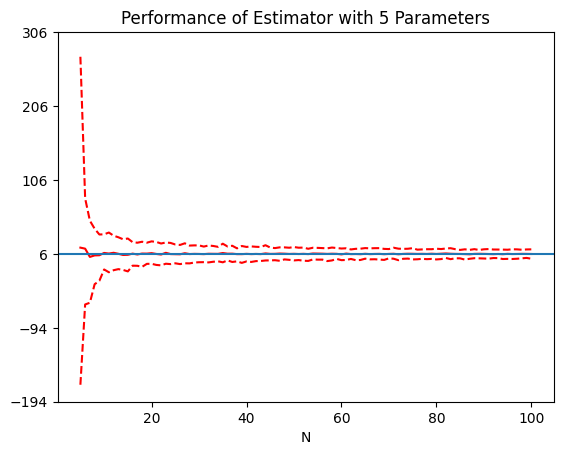

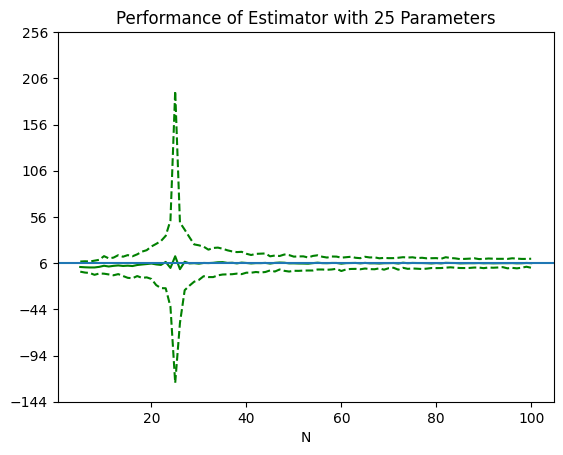

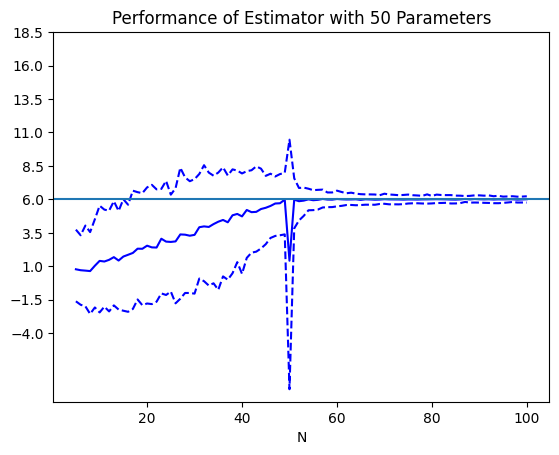

In [226]:
colors = {5: 'red', 25: 'green', 50: 'blue'}
for key in res.keys():
    plt.figure()
    
    b_hat_mean = np.mean(res[key], axis = 1)
    b_hat_5 = np.percentile(res[key], 5, axis = 1)
    b_hat_95 = np.percentile(res[key],  95, axis = 1)
    ix = np.arange(5, 101)
    
    sns.lineplot(x = ix, y = b_hat_mean, color = colors[key])
    sns.lineplot(x = ix, y = b_hat_5, color = colors[key], linestyle = '--')
    sns.lineplot(x = ix, y = b_hat_95, color = colors[key], linestyle = '--')

    plt.axhline(y = beta[0])
    current_ticks = list(plt.yticks()[0])  
    plt.yticks(sorted(current_ticks + beta[0])) 
    plt.title(f"Performance of Estimator with {key} Parameters")
    plt.xlabel("N")
plt.show()

When removing the elements at $N = 5, 6, 7, 8, 9, 23, 24, 25, 26, 27$ we get the following figure

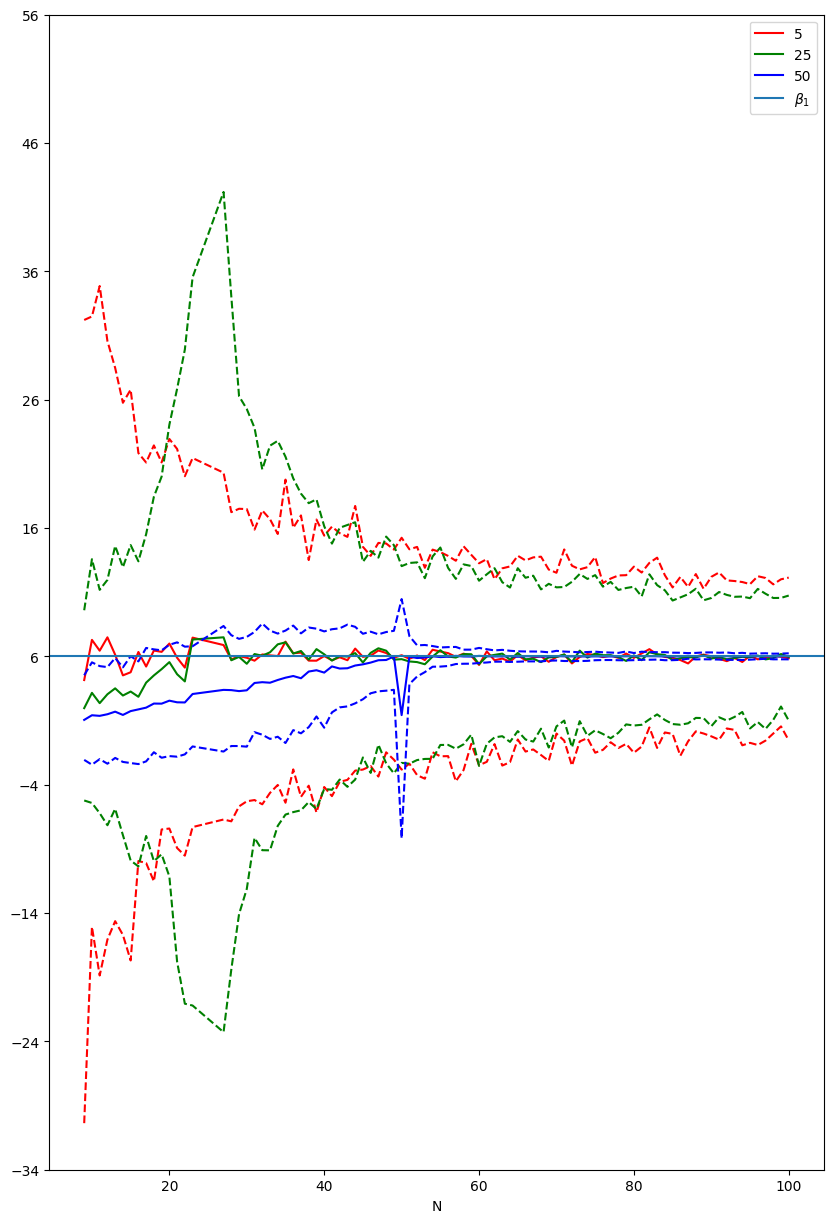

In [228]:
ind = [0,1,2,3,19,20,21]
plt.figure(figsize=(10,15))
for key in res.keys():
    b_hat_mean = np.delete(np.mean(res[key], axis = 1), ind)
    b_hat_5 = np.delete(np.percentile(res[key], 5, axis = 1), ind)
    b_hat_95 = np.delete(np.percentile(res[key],  95, axis = 1), ind)
    ix = np.delete(np.arange(5, 101), ind)
    
    sns.lineplot(x = ix, y = b_hat_mean, color = colors[key], label = f'{key}')
    sns.lineplot(x = ix, y = b_hat_5, color = colors[key], linestyle = '--')
    sns.lineplot(x = ix, y = b_hat_95, color = colors[key], linestyle = '--')

current_ticks = list(plt.yticks()[0])  
plt.yticks(sorted(current_ticks + beta[0])) 
plt.axhline(y = beta[0], label = r'$\beta_1$')
plt.xlabel("N")
plt.legend()
plt.show()

4. It is clear that the estimators are slightly biased in the positive direction. The bias is always relatively small, with it decreasing as N gets larger. The variance is very huge when $N < d$ where $d$ is the dimension of the regression. However, with this said, it is clear that $d=50$ performed by far the best compared to the other estimators. 

5. In this case, it may seem that more data is always better, however this conceals the true matter of this simulation. The reason the $50$ dimensional regression performed best was because this regression was correctly specified, and the others very much weren't. In the cases where the regressions were misspecified, i.e. with 5 and 25 covariates, the 5 covariate regression had a lower variance. 

6. It is best to correctly specify your regression, but if you don't, fewer covariates will result in a slightly better variance. In either case, you would like to gather enough data to dwarf the dimension of your regression, since at around 50 or more samples, both of the misspecified regressions seemed to perform the same. 